# neuralthreads
[medium](https://neuralthreads.medium.com/i-was-not-satisfied-by-any-deep-learning-tutorials-online-37c5e9f4bea1)

## Chapter 2 — Optimizers

Optimizers racing to the Minima

### 2.10 Optimizers racing to the Minima

This will be the final post in Chapter 2 — Optimizers.

> Note — It is recommended that you have a look at the previous posts in which we talked about  
> [SGD](./own_tutorial_4.ipynb)  
> [SGD with Momentum](./own_tutorial_5.ipynb)  
> [SGD with Nesterov acceleration](./own_tutorial_6.ipynb)  
> [Adagrad](./own_tutorial_7.ipynb)  
> [RMSprop](./own_tutorial_8.ipynb)  
> [Adadelta](./own_tutorial_9.ipynb)  
> [Adam](./own_tutorial_10.ipynb)  
> [Amsgrad](./own_tutorial_11.ipynb)  
> [Adamax](./own_tutorial_12.ipynb)  

Here we will create an animation in which all the 9 Optimizers which we have seen in the previous posts will race each other to reach the Minima. But before going further, few things first.

**First**, this post is neither a true nor a pseudo comparison of Optimizers. I strongly recommend you to go through the literature before arriving at the conclusion ‘Which Optimizers is the best?’ There are many things that were skipped in previous posts, one of them is the mathematical motivation to develop the optimizers.

**Second**, epsilon in optimizers is used for stability and by stability, I mean this:  
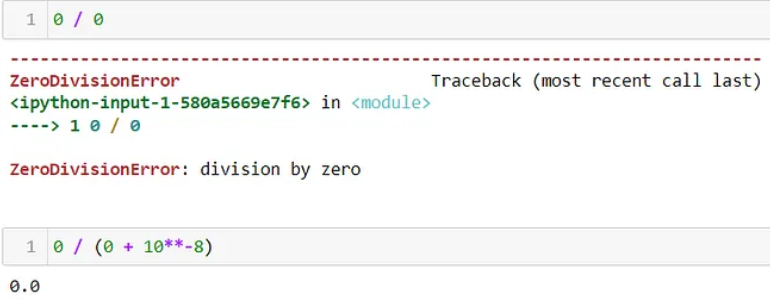  

Suppose, we start from a point that is already the minima, in that case, using epsilon will prevent error division by zero.

But, for the case of Adadelta, epsilon was used to kick-start the Optimizer. So, we will use epsilon = 10**-6 for Adadelta and 10**-8 for all other optimizers.

And, we will be using a learning rate = 0.15 for Adagrad and 0.01 for all other optimizers except for Adadelta for which we will use learning rate = 1.

**Third**, this post gives you an idea of how to make such videos. You can also plot in 3-D and can see how we are sliding to reach the minima or you can put a color contour on the background which gives you an idea of function values.

All the steps are similar to what we did in the previous 9 videos. We will store starting point and updated points in a list, **but this time we will use all values up to iᵗʰ index for iᵗʰ frame of our animation**. We will start from points (3, 4). And the animation will be of 1500 frames at 50 fps.

> Note — You will notice that for some optimizers minima is not exactly reached but that is okay for us. We will focus on their trajectory. You may animate yourself up to 2000 frames or even more.

And, now the animation for the race.




In [5]:
import numpy as np 
np.random.seed(42)
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
from matplotlib.animation import PillowWriter

We will use the same 2 variable function which we used for the previous 9 posts.

In [6]:
%%latex
\begin{gather*}
    f = 2x^{2} + 2xy + 2y^{2} - 6x \\
        \\
        \text{We know that Minima for this function is at (2, -1)} \\
        \text{and we will start from (1, 0)}\\
        \text{The partial derivatives are}\\
        \\
        \frac{\partial f}{\partial x} = 4x + 2y - 6 \\
        \frac{\partial f}{\partial y} = 2x + 4y \\
 \end{gather*}

<IPython.core.display.Latex object>

In [7]:
def f(x, y):                                    # function
    return 2*(x**2) + 2*x*y + 2*(y**2) - 6*x    # definition

def fdash_x(x, y):                              # partial derivative
    return 4*x + 2*y - 6                        # w.r.t x

def fdash_y(x, y):                              # partial derivative
    return 2*x + 4*y                            # w.r.t y

def gradient(point):                            # gradients
    return np.array([[     fdash_x(point[0][0], point[1][0])     ],
                     [     fdash_y(point[0][0], point[1][0])     ]], dtype = np.float64)    

Now we will store updated points in the lists which initially have the starting point in them.

### SGD

In [8]:
point_sgd = [np.array([[   3   ],                         # list
                       [   4   ]], dtype = np.float64)]
point = np.array([[   3   ],
                  [   4   ]], dtype = np.float64)
learning_rate = 0.01

for i in range(1500):
    update = - learning_rate * gradient(point)  
    point += update
    
    point_sgd.append(point.copy())                        # adding updated points to the list
    
point

array([[ 2.],
       [-1.]])

### SGD with Momentum

In [9]:
point_sgd_momentum = [np.array([[   3   ],                # list
                                [   4   ]], dtype = np.float64)]
point = np.array([[   3   ],
                  [   4   ]], dtype = np.float64)
learning_rate = 0.01

momentum = 0.9
update = np.array([[   0   ],
                   [   0   ]], dtype = np.float64)

for i in range(1500):
    update = - learning_rate * gradient(point) + momentum * update
    point += update
    
    point_sgd_momentum.append(point.copy())               # adding updated points to the list
    
point

array([[ 2.],
       [-1.]])

### SGD with Nesterov acceleration

In [10]:
point_sgd_nesterov = [np.array([[   3   ],                # list
                                [   4   ]], dtype = np.float64)]
point = np.array([[   3   ],
                  [   4   ]], dtype = np.float64)
learning_rate = 0.01

momentum = 0.9
update = np.array([[   0   ],
                   [   0   ]], dtype = np.float64)

for i in range(1500):
    update = - learning_rate * gradient(point) + momentum * update
    update_ = - learning_rate * gradient(point) + momentum * update
    point += update_
    
    point_sgd_nesterov.append(point.copy())               # adding updated points to the list
    
point

array([[ 2.],
       [-1.]])

### Adagrad

In [11]:
point_adagrad = [np.array([[   3   ],                    # list
                           [   4   ]], dtype = np.float64)]
point = np.array([[   3   ],
                  [   4   ]], dtype = np.float64)
learning_rate = 0.15
accumulator = np.array([[   0.1   ],
                        [   0.1   ]], dtype = np.float64)
epsilon = 10**-8

for i in range(1500):
    accumulator += gradient(point)**2
    update = - learning_rate * gradient(point) / (accumulator**0.5 + epsilon)
    point += update
    
    point_adagrad.append(point.copy())                    # adding updated points to the list
    
point

array([[ 1.94584295],
       [-0.91869223]])

### RMSprop

In [13]:
point_rmsprop = [np.array([[   3   ],                     # list
                           [   4   ]], dtype = np.float64)]
point = np.array([[   3   ],
                  [   4   ]], dtype = np.float64)
learning_rate = 0.01

rho = 0.9
accumulator = np.array([[   0   ],
                        [   0   ]], dtype = np.float32)
epsilon = 10**-8

for i in range(1500):
    accumulator = rho * accumulator + (1 - rho) * gradient(point)**2
    update = - learning_rate * gradient(point) / (accumulator**0.5 + epsilon)
    point += update
    
    point_rmsprop.append(point.copy())                    # adding updated points to the list
    
point

array([[ 2.005],
       [-0.995]])

### Adadelta

In [12]:
point_adadelta = [np.array([[   3   ],                    # list
                            [   4   ]], dtype = np.float64)]
point = np.array([[   3   ],
                  [   4   ]], dtype = np.float64)
learning_rate = 1

rho = 0.95
epsilon = 10**-6

accumulator_gradient = np.array([[   0   ],
                                 [   0   ]], dtype = np.float64)
accumulator_update = np.array([[   0   ],
                               [   0   ]], dtype = np.float64)

for i in range(1500):
    accumulator_gradient = rho * accumulator_gradient + (1 - rho) * gradient(point)**2
    update = - gradient(point) * (accumulator_update + epsilon)**0.5 / (accumulator_gradient + epsilon)**0.5
    accumulator_update = rho * accumulator_update + (1 - rho) * update**2
    point += learning_rate * update
    
    point_adadelta.append(point.copy())                   # adding updated points to the list
    
point

array([[ 1.992466  ],
       [-0.99896112]])

### Adam

In [14]:
point_adam = [np.array([[   3   ],                        # list
                        [   4   ]], dtype = np.float64)]
point = np.array([[   3   ],
                  [   4   ]], dtype = np.float64)
learning_rate = 0.01

beta1 = 0.9
beta2 = 0.999
epsilon = 10**-8

moment1 = np.array([[   0   ],
                    [   0   ]], dtype = np.float64)
moment2 = np.array([[   0   ],
                    [   0   ]], dtype = np.float64)

for i in range(1500):
    learning_rate_hat = learning_rate * np.sqrt(1 - beta2**(i + 1)) / (1 - beta1**(i + 1))
    moment1 = beta1 * moment1 + (1 - beta1) * gradient(point)
    moment2 = beta2 * moment2 + (1 - beta2) * gradient(point)**2
    update = - learning_rate_hat * moment1 / (moment2**0.5 + epsilon)
    point += update
    
    point_adam.append(point.copy())                       # adding updated points to the list
    
point


array([[ 1.97244289],
       [-0.96116886]])

### Amsgrad

In [15]:
point_amsgrad = [np.array([[   3   ],                     # list
                           [   4   ]], dtype = np.float64)]
point = np.array([[   3   ],
                  [   4   ]], dtype = np.float64)

learning_rate = 0.01        
beta1 = 0.9
beta2 = 0.999
epsilon = 10**-8

moment1 = np.array([[   0   ],
                    [   0   ]], dtype = np.float64)
moment2 = np.array([[   0   ],
                    [   0   ]], dtype = np.float64)
moment2_hat = np.array([[   0   ],
                        [   0   ]], dtype = np.float64)
for i in range(1500):
    learning_rate_hat = learning_rate * np.sqrt(1 - beta2**(i + 1)) / (1 - beta1**(i + 1))
    moment1 = beta1 * moment1 + (1 - beta1) * gradient(point)
    moment2 = beta2 * moment2 + (1 - beta2) * gradient(point)**2
    moment2_hat = np.maximum(moment2_hat, moment2)
    update = - learning_rate_hat * moment1 / (moment2_hat**0.5 +
                                                          epsilon)
    point += update
    
    point_amsgrad.append(point.copy())                    # adding updated points to the list
    
point

array([[ 1.92458927],
       [-0.89798104]])

### Adamax

In [16]:
point_adamax = [np.array([[   3   ],                      # list
                          [   4   ]], dtype = np.float64)]
point = np.array([[   3   ],
                  [   4   ]], dtype = np.float64)

learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999
epsilon = 10**-8

moment = np.array([[   0   ],
                   [   0   ]], dtype = np.float64)
weight = np.array([[   0   ],
                   [   0   ]], dtype = np.float64)

for i in range(1500):
    learning_rate_hat = learning_rate / (1 - beta1**(i + 1))
    moment = beta1 * moment + (1 - beta1) * gradient(point)
    weight = np.maximum(beta2 * weight, abs(gradient(point)))
    update = - learning_rate_hat * moment / (weight + epsilon)
    point += update
    
    point_adamax.append(point.copy())                     # adding updated points to the list
    
point


array([[ 1.94774683],
       [-0.93518353]])

## Animation for the race 

We will do some settings for our graph for the animation. You can change them if you want something different.

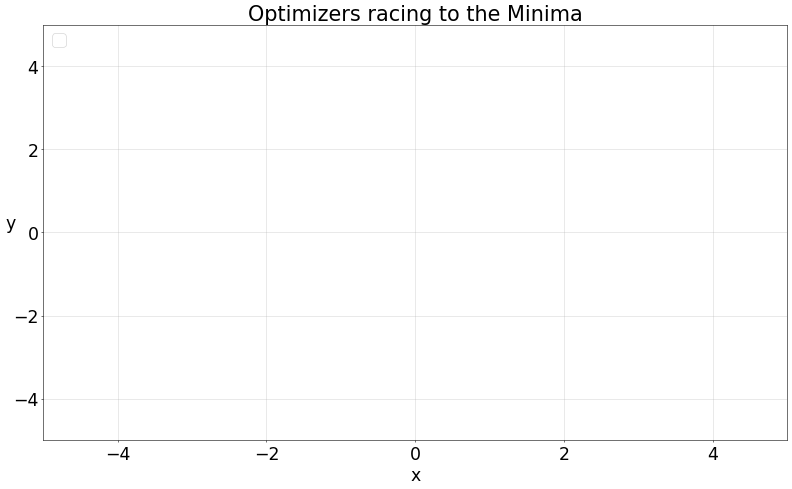

In [17]:
plt.rcParams.update({'font.size': 25})

fig = plt.figure(dpi = 50)
fig.set_figheight(10.80)
fig.set_figwidth(19.20)

ax = plt.axes()
ax.grid(alpha = 0.5)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xlabel('x')
ax.set_ylabel('y', rotation = 0)
ax.set_title('Optimizers racing to the Minima')
ax.legend(['SGD, lr = 0.01', 'SGD_Momentum, lr = 0.01', 'SGD_Nesterov, lr = 0.01', 
           'Adagrad, lr = 0.15', 'RMSProp, lr = 0.01 &', 'Adadelta, lr = 1 & ep = 10**-6',
           'Adam, lr = 0.01', 'Amsgrad, lr = 0.01', 'Adamax, lr = 0.01'], loc = "upper left")

In [18]:
ax.hlines(-1, -5, 5, linestyles = 'dashed', alpha = 0.5)
ax.vlines(3, -5, 5, linestyles = 'dashed', alpha = 0.5)

lines = []
for index in range(9):
    lobj = ax.plot([], [], lw = 2)[0]
    lines.append(lobj)
    
def init():
    for line in lines:
        line.set_data([], [])
    return lines

In [20]:
xdata_sgd, ydata_sgd = [], [] 
xdata_sgd_momentum, ydata_sgd_momentum = [], []
xdata_sgd_nesterov, ydata_sgd_nesterov = [], [] 
xdata_adagrad, ydata_adagrad = [], [] 
xdata_rmsprop, ydata_rmsprop = [], [] 
xdata_adadelta, ydata_adadelta = [], [] 
xdata_adam, ydata_adam = [], [] 
xdata_amsgrad, ydata_amsgrad = [], [] 
xdata_adamax, ydata_adamax = [], []

[1.0]